In [1]:
# Pandas
import pandas as pd

# SQL Alchemy
from sqlalchemy import create_engine

In [3]:
# Create Engine for census data
bellybutton_path = "db/bellybutton.sqlite"
engine = create_engine(f"sqlite:///{bellybutton_path}")
conn = engine.connect()

In [4]:
# Query All Records in the the Sample_Metadata Table
sample_metadata = pd.read_sql("SELECT * FROM sample_metadata", conn)

In [5]:
sample_metadata.head()

,sample,EVENT,ETHNICITY,GENDER,AGE,WFREQ,BBTYPE,LOCATION,COUNTRY012,ZIP012,...,DOG,CAT,IMPSURFACE013,NPP013,MMAXTEMP013,PFC013,IMPSURFACE1319,NPP1319,MMAXTEMP1319,PFC1319
0,940,BellyButtonsScienceOnline,Caucasian,F,24.0,2.0,I,Beaufort/NC,usa,22306,...,no,no,8852.0,37.172222,54.5,None,1,NaN,33.990002,25.5
1,941,None,Caucasian/Midleastern,F,34.0,1.0,I,Chicago/IL,None,None,...,None,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN
2,943,BellyButtonsScienceOnline,Caucasian,F,49.0,1.0,I,Omaha/NE,None,None,...,None,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN
3,944,BellyButtonsScienceOnline,European,M,44.0,1.0,I,NewHaven/CT,usa,7079,...,no,yes,NaN,35.816666,16.0,None,0,6567.0,32.403332,28.5
4,945,BellyButtonsScienceOnline,Caucasian,F,48.0,1.0,I,Philidelphia/PA,usa,84404,...,no,no,NaN,37.783333,4.0,None,0,5613.0,33.634445,24.0


## Samples Metadata is information from participants
Belly Button Meta Data Matrix: Again, belly button sample numbers (unique to each participant, n=153) are on the top row. The first column contains meta-data collected for each participant. Row 2 represents sample collection event. Rows 3-14 are information self-reported by participants. Rows 15-22 are landscape-level environmental factors determined from publically available data layers including the National Land Cover Database, WorldClim, and MODIS. Values correspond to the pixel located at the center of each zip code reported.

In [6]:
# Query All Records in the the Samples Table
samples = pd.read_sql("SELECT * FROM samples", conn)

In [7]:
samples.head()

,otu_id,otu_label,940,941,943,944,945,946,947,948,...,1562,1563,1564,1572,1573,1574,1576,1577,1581,1601
0,1,Archaea;Euryarchaeota;Halobacteria;Halobacteri...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,Archaea;Euryarchaeota;Halobacteria;Halobacteri...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,Archaea;Euryarchaeota;Halobacteria;Halobacteri...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,Archaea;Euryarchaeota;Methanobacteria;Methanob...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5,Archaea;Euryarchaeota;Methanobacteria;Methanob...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Samples is a matrix of participants across the top and the type of bacteria down the left.

Belly Button Data Matrix: Belly button sample numbers (unique to each participant, n=153) are on the top row and lowest taxonomic level of bacteria and archaea identified (‘phylotype’ or OTU, operational taxonomic unit) are in the second column. (OTU ID # is listed in the first column for ease of reference). Taxonomies reflect the lowest taxonomic level to which samples could be given a name. If samples were so different from existing samples as to not readily be classified they are simply labeled "bacteria" reflecting that they were different from everything we know. Taxonomies presented follow the taxonomic rank you learned about in Intro Biology: Kingdom (or Domain in the case of Archaea); Phylum; Subphylum; Order; Family; Genus. See Hulcr et al. 2012 for specific methods. Numbers in the table indicate sequencing read numbers.

### Find more information using: Advanced data storage and retrieval --> 1 --> Student - ReadAllTheSQLs

In [10]:
# Create Engine for census data
belly_button_biodiversity_path = "db/belly_button_biodiversity.sqlite"
engine = create_engine(f"sqlite:///{belly_button_biodiversity_path}")
conn = engine.connect()

In [11]:
# Query All Records in the the Sample_Metadata Table
sample_metadata_biodiversity = pd.read_sql("SELECT * FROM samples_metadata", conn)

## other tables include otu and samples

In [12]:
sample_metadata_biodiversity.head()

,SAMPLEID,EVENT,ETHNICITY,GENDER,AGE,WFREQ,BBTYPE,LOCATION,COUNTRY012,ZIP012,...,DOG,CAT,IMPSURFACE013,NPP013,MMAXTEMP013,PFC013,IMPSURFACE1319,NPP1319,MMAXTEMP1319,PFC1319
0,940,BellyButtonsScienceOnline,Caucasian,F,24,2.0,I,Beaufort/NC,usa,22306,...,no,no,8852,37.172222,54.5,0.0,1,0.0,33.990002,25.5
1,941,0,Caucasian/Midleastern,F,34,1.0,I,Chicago/IL,0,0,...,0,0,0,0.000000,0.0,0.0,0,0.0,0.000000,0.0
2,943,BellyButtonsScienceOnline,Caucasian,F,49,1.0,I,Omaha/NE,0,0,...,0,0,0,0.000000,0.0,0.0,0,0.0,0.000000,0.0
3,944,BellyButtonsScienceOnline,European,M,44,1.0,I,NewHaven/CT,usa,7079,...,no,yes,0,35.816666,16.0,0.0,0,6567.0,32.403332,28.5
4,945,BellyButtonsScienceOnline,Caucasian,F,48,1.0,I,Philidelphia/PA,usa,84404,...,no,no,0,37.783333,4.0,0.0,0,5613.0,33.634445,24.0


## Data Dictionary
Data Collection event  
Ethnicity Gender (male/female) 
Age (in years) 
Washing Frequency (belly button scrubs per week) 
Innie or Outtie? 
City and State in which participant lived at time of sampling 
Country in which participant lived from age 0 to 12 
Zip code in which participant lived from age 0 to 12 
Country in which participant lived from age 13 to 19 
Zip code in which participant lived from age 13 to 19 
Do you Currently Live with a Dog (yes or no)? 
Do you Currently Live with a Cat (yes or no)? 
Impervious surface (such as cement) in center of zipcode where participant lived from 0 to 13 
Net Primary Productivity in center of zipcode where participant lived from 0 to 13 
Mean maximum monthly temperature in center of zipcode where participant lived from 0 to 13 
Percent Forest Cover in center of zipcode where participant lived from 0 to 13 
Impervious surface (such as cement) in center of zipcode where participant lived from 13 to 19 
Net Primary Productivity Impervious surface (such as cement) in center of zipcode where participant lived from 13 to 19 
Mean maximum monthly temperaturein center of zipcode where participant lived from 13 to 19 
Percent Forest Cover in center of zipcode where participant lived from 13 to 19 
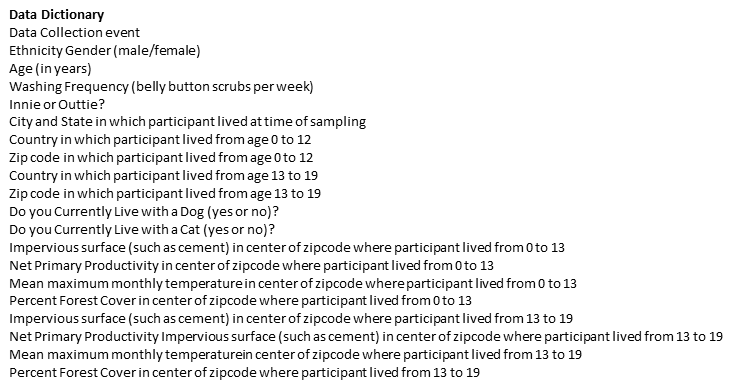

## http://robdunnlab.com/projects/belly-button-biodiversity/results-and-data/


In [13]:
# Query All Records in the the Sample_Metadata Table
otu_biodiversity = pd.read_sql("SELECT * FROM otu", conn)

## other tables include otu and samples

In [14]:
otu_biodiversity.head()

,otu_id,lowest_taxonomic_unit_found
0,1,Archaea;Euryarchaeota;Halobacteria;Halobacteri...
1,2,Archaea;Euryarchaeota;Halobacteria;Halobacteri...
2,3,Archaea;Euryarchaeota;Halobacteria;Halobacteri...
3,4,Archaea;Euryarchaeota;Methanobacteria;Methanob...
4,5,Archaea;Euryarchaeota;Methanobacteria;Methanob...


## Testing out Routes for Homework

In [15]:
import os

import pandas as pd
import numpy as np

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

from flask import Flask, jsonify, render_template
from flask_sqlalchemy import SQLAlchemy

app = Flask(__name__)



In [23]:
def names():
    #Return a list of sample names.

    # Use Pandas to perform the sql query
   
    stmt = db.session.query(Samples).statement
    df = pd.read_sql_query(stmt, db.session.bind)

    # Return a list of the column names (sample names)
    return (list(samples.columns)[2:])
names()

NameError: name 'db' is not defined